In [4]:
img_prompt_dalle = "Cartoon picture of Healthy Diet - Depicted are fruits and vegetables, water, and wholemeal bread."
img_path_dalle = "C:/Users/Miriam/LRZ Sync+Share/Promotion/LS Bilder/DALLE-3/Begriffe - Healthy Diet/_cd760c92-c228-4207-8331-5df86bd775b9.jfif"

In [2]:
import torch
import clip
from PIL import Image

def get_clip_score(image_path, text):
    # Load the pre-trained CLIP model and the image
    model, preprocess = clip.load('ViT-B/32')
    image = Image.open(image_path)

    # Preprocess the image and tokenize the text
    image_input = preprocess(image).unsqueeze(0)
    text_input = clip.tokenize([text])
    
    # Move the inputs to GPU if available
    device = "cuda" if torch.cuda.is_available() else "cpu"
    image_input = image_input.to(device)
    text_input = text_input.to(device)
    model = model.to(device)
    
    # Generate embeddings for the image and text
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)
    
    # Normalize the features
    image_features = image_features / image_features.norm(dim=-1, keepdim=True)
    text_features = text_features / text_features.norm(dim=-1, keepdim=True)
    
    # Calculate the cosine similarity to get the CLIP score
    clip_score = torch.matmul(image_features, text_features.T).item()
    
    return clip_score

score = get_clip_score(img_path_dalle, img_prompt_dalle)
print(f"CLIP Score: {score}")

D:\Documents\workspaces\PyCharm projects\ExplainImageGen\vision_venv\lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


CLIP Score: 0.34716796875


** Cartoon picture of Healthy Diet - Depicted are fruits and vegetables, water, and wholemeal bread.


100%|██████████| 6/6 [00:18<00:00,  3.10s/it]


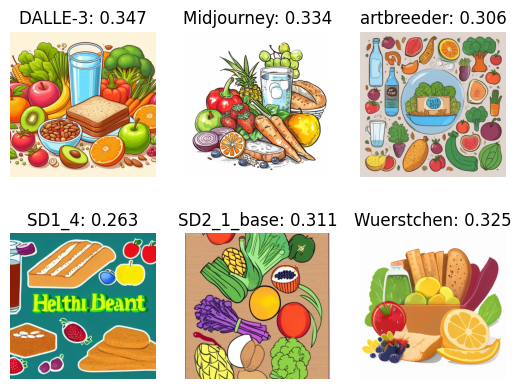

In [25]:
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

img_prompt = "Cartoon picture of Healthy Diet - Depicted are fruits and vegetables, water, and wholemeal bread."
base_path = "C:/Users/Miriam/LRZ Sync+Share/Promotion/LS Bilder/"
img_paths = [
    "DALLE-3/Begriffe - Healthy Diet/_cd760c92-c228-4207-8331-5df86bd775b9.jfif",
    "Midjourney/Healthy_Diet_1.png",
    "artbreeder/Healthy_Diet_1.jfif",
    "SD1_4/Healthy_Diet_2.png",
    "SD2_1_base/Healthy_Diet_0.png",
    "Wuerstchen/Healthy_Diet_3.png"
]

def compare_clip_scores(base_path, img_paths, img_prompt):    
    fig, ax = plt.subplots(2, math.ceil(len(img_paths)/2))
    ax = ax.flatten()
    print("**", img_prompt)
    for i, img_path in tqdm(enumerate(img_paths), total=len(img_paths)):
        ax[i].set_axis_off()
        ax[i].imshow(Image.open(base_path + img_path))
        ax[i].title.set_text(f"{img_path.split('/')[0]}: {round(get_clip_score(base_path + img_path, img_prompt), 3)}")
    plt.show()
    
compare_clip_scores(base_path, img_paths, img_prompt)

** Cartoon picture of Despair - A woman covers her face with both hands. She cries heavily, tears running down her hands.


100%|██████████| 6/6 [00:18<00:00,  3.09s/it]


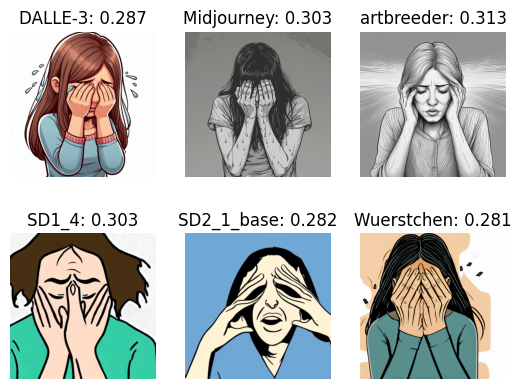

In [26]:
img_prompt = "Cartoon picture of Despair - A woman covers her face with both hands. She cries heavily, tears running down her hands."
img_paths = [
    "DALLE-3/Gefuehle - Despair/_915113d1-794a-462c-a143-d691aa2e41b9.jfif",
    "Midjourney/Despair_1.png",
    "artbreeder/Despair_1.jfif",
    "SD1_4/Despair_3.png",
    "SD2_1_base/Despair_3.png",
    "Wuerstchen/Despair_0.png"
]

compare_clip_scores(base_path, img_paths, img_prompt)

## CLIP scores for all images

In [1]:
import pandas as pd

scores = pd.read_csv("clip_scores_ViT-L.csv")
scores.groupby(["model"])["clip_score"].mean()

model
DALLE-3       0.255095
Midjourney    0.261034
SD1_4         0.221177
SD2_1_base    0.239639
SD_3          0.271895
Wuerstchen    0.242458
artbreeder    0.249177
references    0.272697
Name: clip_score, dtype: float64

In [5]:
scores = pd.read_csv("clip_scores_ViT-L_wo.csv")
scores.groupby(["model"])["clip_score"].mean()

model
DALLE-3       0.258974
Midjourney    0.259106
SD1_4         0.231057
SD2_1_base    0.240426
SD_3          0.270255
Wuerstchen    0.239094
artbreeder    0.246479
references    0.265170
Name: clip_score, dtype: float64

In [6]:
scores = pd.read_csv("clip_scores_RN50.csv")
scores.groupby(["model"])["clip_score"].mean()

model
DALLE-3       0.237572
Midjourney    0.238354
SD1_4         0.201253
SD2_1_base    0.215290
SD_3          0.250383
Wuerstchen    0.217465
artbreeder    0.225488
references    0.254237
Name: clip_score, dtype: float64